<hr/>

# Data Mining  [EN.550.636.02]

04/06/2018

**TA** - Cong Mu (cmu2@jhu.edu)   <br/>
**Office Hour** - Monday 9:00am ~ 11:00am

- **K-Means**
- **Gaussian Mixture Model**
- **Q & A**

<hr/>


[Install Python](https://www.python.org/) <br/>
[Install Anaconda](https://www.continuum.io/downloads)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

<h2><font color="darkblue">K-Means</font></h2>
<hr/>

### Intuition

- Minimize the sum of squares (distance between each point and centroid) within each cluster

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" width=400 align=center \>
<p style="text-align:right">(Picture from https://en.wikipedia.org/wiki/K-means_clustering)</p>

### Mathematically

- Given data $ \displaystyle \  X = (x_{ij})_{n \times d} \  $, try to cluster $ \displaystyle \  n \  $ observations into $ \displaystyle \  k (\le n) \  $ sets $ \displaystyle \  S = \{S_1, S_2, \cdots, S_k\} \  $ to minimize the within-cluster sum of squares
> $ \displaystyle \arg\min_{S} \sum_{i=1}^{k} \sum_{\mathbf{x} \in S_i} \lvert\lvert \mathbf{x} - \mathbf{\mu}_i \rvert\rvert^2 $

### Procedure

- Choose $ k $ initial centroids

<img src="https://upload.wikimedia.org/wikipedia/commons/5/5e/K_Means_Example_Step_1.svg" width=300 align=left \>

- Cluster each data point to its nearest centroid

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a5/K_Means_Example_Step_2.svg" width=300 align=left \>

- Update $ k $ new centroids

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3e/K_Means_Example_Step_3.svg" width=300 align=left \>

- Repeat until the centroids do not move significantly

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d2/K_Means_Example_Step_4.svg" width=300 align=left \>

<p style="text-align:right">(Picture from https://en.wikipedia.org/wiki/K-means_clustering)</p>

### Example

In [3]:
digits = datasets.load_digits()
data = scale(digits.data)

In [4]:
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

print(' Number of digits: %d \n Number of samples: %d \n Number of features: %d' % (n_digits, n_samples, n_features))

 Number of digits: 10 
 Number of samples: 1797 
 Number of features: 64


In [5]:
# Cluster
kmeans = KMeans(n_clusters=n_digits, random_state=2018)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2018, tol=0.0001, verbose=0)

In [6]:
# Sum of squared distances of samples to their closest cluster center
kmeans.inertia_

69465.354960396595

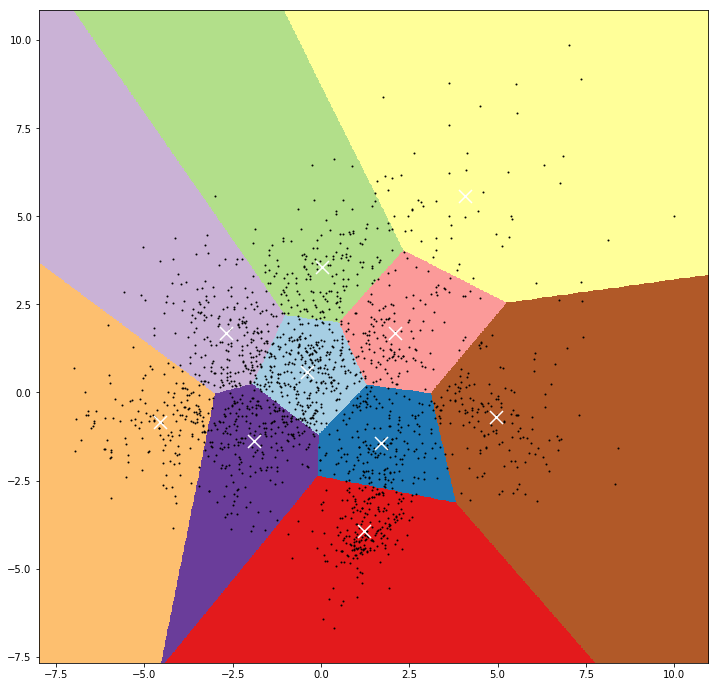

In [7]:
# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(n_clusters=n_digits, random_state=2018)
kmeans.fit(reduced_data);

# Step size of the mesh
h = 0.02     

# Plot the decision boundary
x_min, x_max = reduced_data[:,0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:,1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain clusters for each point in mesh
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Obtain the centroids of each cluster
centroids = kmeans.cluster_centers_

# Put the result into a color plot
Z = Z.reshape(xx.shape)

figure(figsize=(12, 12))
imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower');
plot(reduced_data[:,0], reduced_data[:,1], 'k.', markersize=2);
scatter(centroids[:,0], centroids[:,1], marker='x', s=169, linewidths=3, color='w', zorder=10);

<br/>
- **Note:** For `KMeans` in scikit-learn
> Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. One method to help address this issue is the `k-means++` initialization scheme, which has been implemented in scikit-learn (use the `init='k-means++'` parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization.

[References](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

### Assumptions of K-Means

In [8]:
# Generate data
n_samples = 1500
random_state = 2018
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

In [9]:
# 3 'class'
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([500, 500, 500]))

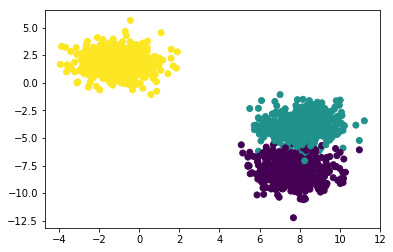

In [10]:
scatter(X[:,0], X[:,1], c=y);

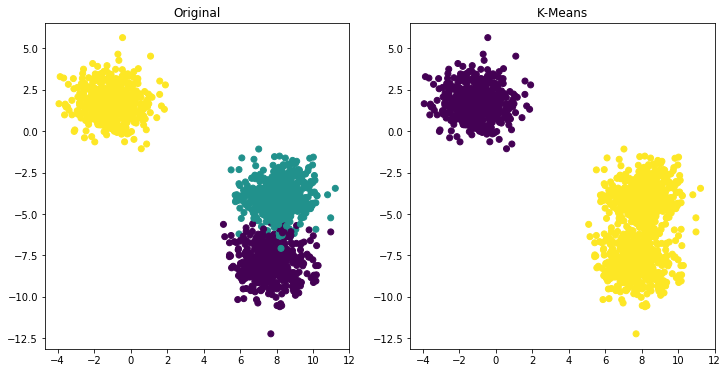

In [11]:
# Incorrect number of clusters
c1 = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

figure(figsize=(12, 6))
subplot(121);
title('Original');
scatter(X[:,0], X[:,1], c=y);
subplot(122);
title('K-Means');
scatter(X[:,0], X[:,1], c=c1);

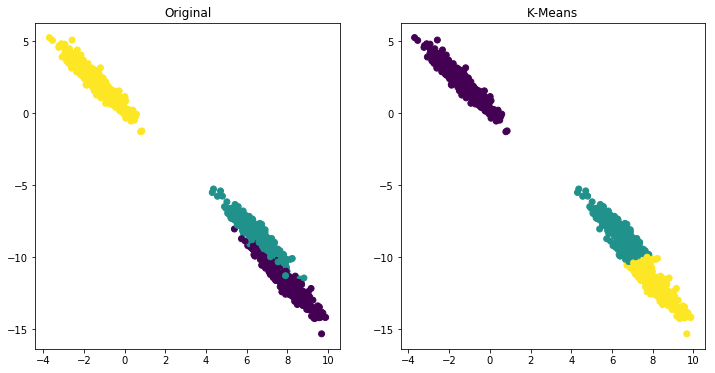

In [12]:
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X2 = np.dot(X, transformation)
c2 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X2)

figure(figsize=(12, 6))
subplot(121);
title('Original');
scatter(X2[:,0], X2[:,1], c=y);e
subplot(122);
title('K-Means');
scatter(X2[:,0], X2[:,1], c=c2);

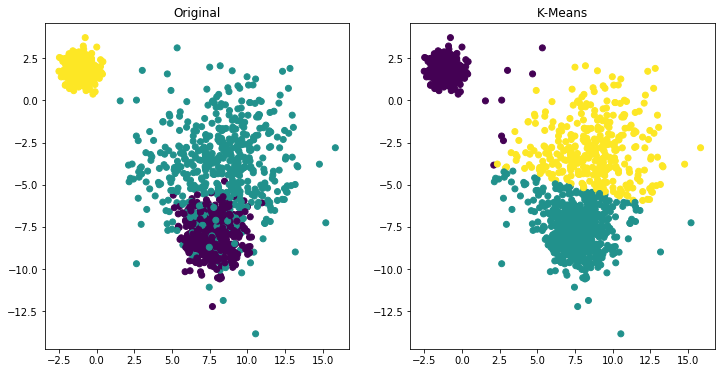

In [13]:
# Different variance
X3, y3 = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
c3 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X3)

figure(figsize=(12, 6))
subplot(121);
title('Original');
scatter(X3[:,0], X3[:,1], c=y3);
subplot(122);
title('K-Means');
scatter(X3[:,0], X3[:,1], c=c3);

<h2><font color="darkblue">Gaussian Mixture Model</font></h2>
<hr/>

### Intuition

- Infer the parameters of $ k $ components

- For example, a mixture of two Gaussians ($ k = 2 $)

> $ \displaystyle \qquad f(x) = \pi_1 \cdot \frac{1}{\sqrt{2 \pi} \sigma_1} \exp\left[-\frac{(x-\mu_1)^2}{2 \sigma_1^2}\right] + (1-\pi_1) \cdot \frac{1}{\sqrt{2 \pi} \sigma_2} \exp\left[-\frac{(x-\mu_2)^2}{2 \sigma_2^2}\right] $

> $ \displaystyle \qquad g(x) = \frac{3}{5} \cdot \frac{1}{\sqrt{2 \pi}} \exp\left[-\frac{(x-4)^2}{2}\right] + \frac{2}{5} \cdot \frac{1}{\sqrt{2 \pi}} \exp\left[-\frac{(x-6)^2}{2}\right] $

### Mathematically

- Maximize likelihood function (e.g. $ k = 2 $)
> $ \displaystyle L(\mathbf{x}; \mathbf{\theta}) = \prod_{i=1}^n \Big[ \kappa_i\, f \left(x_i;\mu_1,\Sigma_1 \right) + (1-\kappa_i)\, f \left(x_i; \mu_2,\Sigma_2 \right) \Big] \quad $ where $ \displaystyle \quad \kappa_i = \mathbb{P}[x_i \  \in \  \text{component}_1] $

- Expectation-Maximization Algorithm
> 0. Start with initial model $ \theta $
> 0. Update $ \theta = \theta_{new} \  $ if $ \ L(\mathbf{x}; \mathbf{\theta_{new}}) > L(\mathbf{x}; \mathbf{\theta}) $
> 0. Repeat until convergence

### Procedure

- E-step
> Calculate $ \  \mathbf{\kappa} \ $ based on the current model $ \theta \  $ and data $ \ \mathbf{x} $

- M-step
> Maximize the likelihood function based on the estimated $ \  \mathbf{\kappa} \ $

### Example

In [14]:
# Generate data
n_samples = 1500
random_state = 2018
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

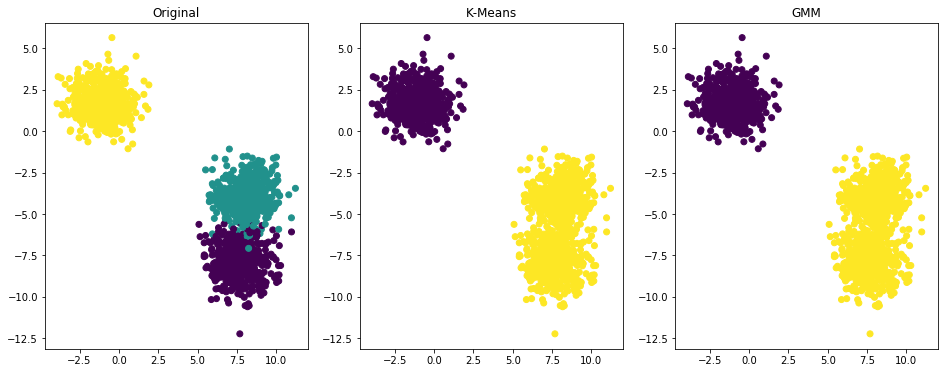

In [15]:
# Incorrect number of clusters
c11 = KMeans(n_clusters=2, random_state=2018).fit_predict(X)
c12 = GaussianMixture(n_components=2, covariance_type='full', random_state=2018).fit(X).predict(X)

figure(figsize=(16, 6))
subplot(131);
title('Original');
scatter(X[:,0], X[:,1], c=y);
subplot(132);
title('K-Means');
scatter(X[:,0], X[:,1], c=c11);
subplot(133);
title('GMM');
scatter(X[:,0], X[:,1], c=c12);

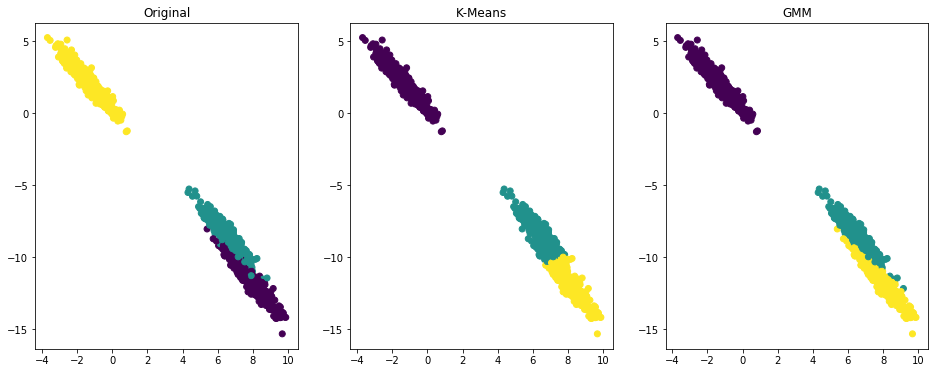

In [16]:
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X2 = np.dot(X, transformation)
c21 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X2)
# All components share the same general covariance matrix
c22 = GaussianMixture(n_components=3, covariance_type='tied', random_state=2018).fit(X2).predict(X2)

figure(figsize=(16, 6))
subplot(131);
title('Original');
scatter(X2[:,0], X2[:,1], c=y);
subplot(132);
title('K-Means');
scatter(X2[:,0], X2[:,1], c=c21);
subplot(133);
title('GMM');
scatter(X2[:,0], X2[:,1], c=c22);

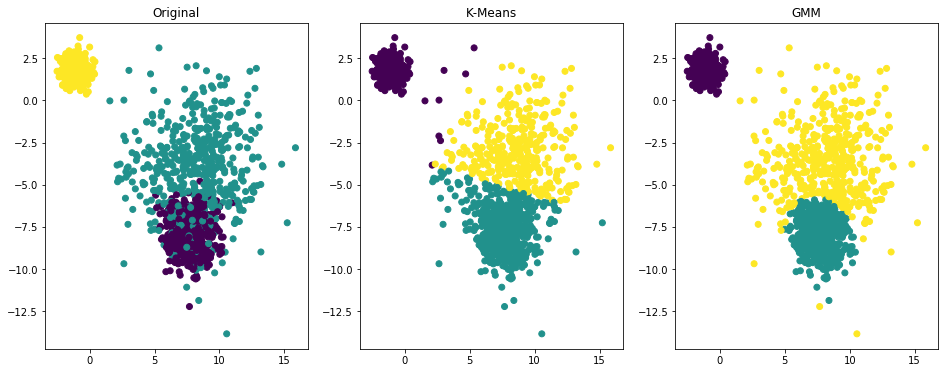

In [18]:
# Different variance
X3, y3 = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
c31 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X3)
# Each component has its own diagonal covariance matrix
c32 = GaussianMixture(n_components=3, covariance_type='full', random_state=2018).fit(X3).predict(X3)

figure(figsize=(16, 6))
subplot(131);
title('Original');
scatter(X3[:,0], X3[:,1], c=y3);
subplot(132);
title('K-Means');
scatter(X3[:,0], X3[:,1], c=c31);
subplot(133);
title('GMM');
scatter(X3[:,0], X3[:,1], c=c32);

<br/>
- **Note:** For `GaussianMixture` in scikit-learn, `covariance_type` could be
> 'full' (each component has its own general covariance matrix)
>
> 'tied' (all components share the same general covariance matrix)
>
> 'diag' (each component has its own diagonal covariance matrix)
>
> 'spherical' (each component has its own single variance)

[References](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)